# Single neuron using Flux.jl

## Read in and process data

In [1]:
using TextParse
using DataFrames
cols, colnames = TextParse.csvread("Apple_Golden_1.dat",'\t')
apples = DataFrame(Dict(name=>col for (name, col) in zip(colnames, cols)))
cols, colnames = TextParse.csvread("bananas.dat",'\t')
bananas = DataFrame(Dict(name=>col for (name, col) in zip(colnames, cols)))

INFO: Precompiling module TextParse.


,blue,green,height,red,width
1,0.207504,0.500662,98,0.583507,99
2,0.186871,0.514869,50,0.609666,99
3,0.187504,0.515759,52,0.610012,99
4,0.239316,0.492939,99,0.568033,69
5,0.183329,0.51485,51,0.609766,99
6,0.183374,0.514609,53,0.608089,99
7,0.186206,0.515487,53,0.608676,99
8,0.188582,0.516486,53,0.609278,99
9,0.241941,0.494501,99,0.569099,67
10,0.189116,0.516183,54,0.610284,99


In [2]:
col1 = 4 #red
col2 = 2 #green

x_apples  = [ [apples[i, col1], apples[i, col2]] for i in 1:size(apples)[1] ]
x_bananas = [ [bananas[i, col1], bananas[i, col2]] for i in 1:size(bananas)[1] ]

xs = vcat(x_apples, x_bananas)

ys = vcat( zeros(size(x_apples)[1]), ones(size(x_bananas)[1]) );

The input data is in `xs` and the labels in `y`

## Using Flux.jl

In [3]:
using Flux

The function $\sigma$ that we have been using is predefined by Flux:

In [4]:
σ

σ (generic function with 3 methods)

In [5]:
methods(σ)

# 3 methods for generic function "σ":
σ(x::Float32) in NNlib at /home/stefankarpinski/.julia/v0.6/NNlib/src/activation.jl:14
σ(x::ForwardDiff.Dual{T,Float32,N} where N) where T in NNlib at /home/stefankarpinski/.julia/v0.6/NNlib/src/activation.jl:18
σ(x) in NNlib at /home/stefankarpinski/.julia/v0.6/NNlib/src/activation.jl:7

In [6]:
?σ

"σ" can be typed by \sigma<tab>

search: σ logσ



```
σ(x) = 1 / (1 + exp(-x))
```

Classic [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation function.


We can make a neuron in a simple way:

In [7]:
model = Dense(2, 1, σ)

Dense(2, 1, NNlib.σ)

In [8]:
typeof(model)

Flux.Dense{NNlib.#σ,TrackedArray{…,Array{Float64,2}},TrackedArray{…,Array{Float64,1}}}

We have made an object of type `Dense`, defined by `Flux`. This represents a "dense neural network layer" (see later).
Inside the object live the parameters that we will modify during the learning process:

In [9]:
model.W

Tracked 1×2 Array{Float64,2}:
 1.03338  0.743812

In [10]:
model.b

Tracked 1-element Array{Float64,1}:
 0.0

The fact that `W` and `b` are of size $1 \times 2$ and $1$, respectively, comes from the `(2, 1)` pair in the call to the `Dense` constructor when we created `model`. A "tracked" array is a special type provided by `Flux.jl` that is able to calculate ("track") derivatives via reverse-mode automatic differentiation, usually called **backpropagation** in the context of neural networks. This is more efficient in this context than calculating the derivatives via forward-mode automatic differentiation, as we did previously using the `ForwardDiff.jl` package.

## 

In [12]:
W = rand(1, 2)
b = rand(1)

predict(x) = σ.(W*x + b)
loss(x, y) = sum(abs2, (predict(x) .- y) )

x, y = rand(2), rand(1) 
loss(x, y) 

0.009759298218302234

We will now see how `Flux.jl` facilitates the type of calculations that we have been doing.
To do so, we use the `param` function to define objects that will contain both the values of 
the parameters `W` and `b` *and* the derivatives. These derivatives will be the derivatives of the loss 
function with respect to `W` and `b` that we calculated previously using `ForwardDiff`.

Let's start, as usual, by setting up some random initial values for the parameters:

In [13]:
W_data = rand(1, 2)  
b_data = rand(1)

W_data, b_data

([0.915194 0.754883], [0.886912])

We now set up `Flux.jl` objects that will contain these values *and* their derivatives, and allow to propagate
this information around:

In [16]:
W = param( W_data )
b = param( b_data )

predict(x) = σ.(W*x + b)
loss(x, y) = sum( (predict(x) .- y).^2 )

x, y = rand(2), rand(1) 
l = loss(x, y) 

0.00010145402473519879 (tracked)

In [17]:
fieldnames(W)

3-element Array{Symbol,1}:
 :tracker
 :data   
 :grad   

We see that the data is indeed inside the object:

In [18]:
W.data  # the random 

1×2 Array{Float64,2}:
 0.915194  0.754883

Initially, the derivatives are zero:

In [19]:
W.grad

1×2 Array{Float64,2}:
 0.0  0.0

Having set up the structure, we can now propagate the derivative information backwards 
from the `loss` function to all of the objects that are used to calculate it:

In [20]:
using Flux.Tracker

back!(l)   # backpropagate derivatives of the loss function

In [21]:
W.grad

1×2 Array{Float64,2}:
 -0.0015329  -0.00128584

In [22]:
b.grad

1-element Array{Float64,1}:
 -0.00197973

We can now use this structure to do stochastic gradient descent, just as we did in the previous notebook.

**Exercise:** Implement this.

In [27]:
function stochastic_gradient_descent(loss, xs, ys, W, b, N=1000)

    η = 0.01

    for i in 1:N
        
        which = rand(1:length(xs))  # choose a data point
        
        xx = xs[which]
        yy = ys[which]
        
        l = loss(xx, yy)
        back!(l)
        
        W.data .-= η * W.grad
        b.data .-= η * b.grad
    
    end
    
    return W, b
    
end
    

stochastic_gradient_descent (generic function with 2 methods)

In [28]:
b

Tracked 1-element Array{Float64,1}:
 0.886912

In [29]:
ys

982-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

In [30]:
W_final, b_final = stochastic_gradient_descent(loss, xs, ys, W, b)

(param([-13.4267 -12.5847]), param([-4.63391]))

In [31]:
W_final

Tracked 1×2 Array{Float64,2}:
 -13.4267  -12.5847

In [32]:
b_final

Tracked 1-element Array{Float64,1}:
 -4.63391

In [34]:
using Plots; gr()

Plots.GRBackend()

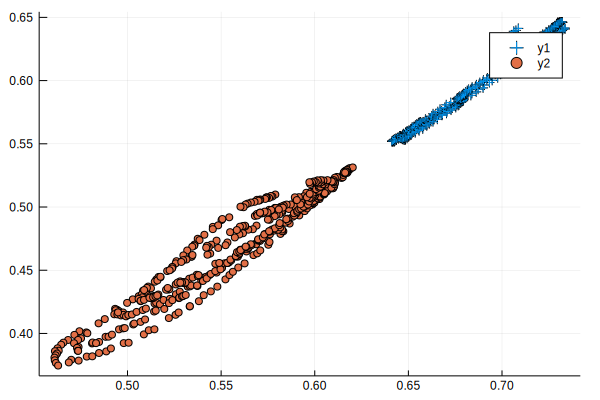

In [35]:
scatter(first.(x_apples), last.(x_apples), m=:cross)
scatter!(first.(x_bananas), last.(x_bananas))

Let's draw the function that the network has learned, together with the data:

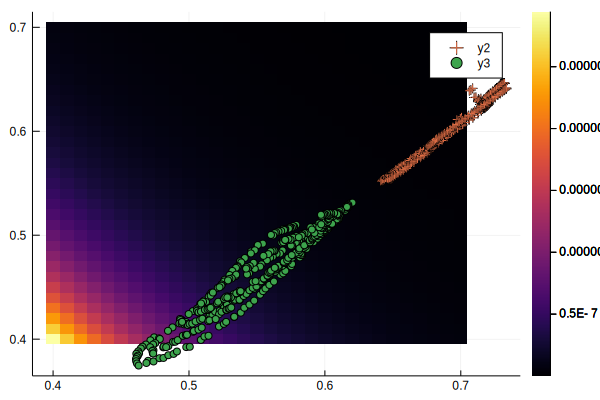

In [36]:
heatmap(0.4:0.01:0.7, 0.4:0.01:0.7, (x,y)->predict([x, y]).data[1])

scatter!(first.(x_apples), last.(x_apples), m=:cross)
scatter!(first.(x_bananas), last.(x_bananas))

TODO: Animation of learning process

## Automation with Flux.jl

We will need to repeat the above process for a lot of different systems.
Fortunately, Flux.jl provides us with tools to automate this.

Firstly, we create the model:

In [37]:
using Flux

In [38]:
model = Dense(2, 1, σ)

Dense(2, 1, NNlib.σ)

In [44]:
model.W

Tracked 1×2 Array{Float64,2}:
 -0.299026  0.267678

In [45]:
model.b

Tracked 1-element Array{Float64,1}:
 0.0

We can use the `model` object just like a function to apply it to data:

In [46]:
model(rand(2))

Tracked 1-element Array{Float64,1}:
 0.428983

Flux has various loss functions built in:

In [47]:
loss(x, y) = Flux.mse(model(x), y)

loss (generic function with 1 method)

In [48]:
data = zip(xs, ys)

Base.Iterators.Zip2{Array{Array{Float64,1},1},Array{Float64,1}}(Array{Float64,1}[[0.708703, 0.641282], [0.648376, 0.553169], [0.647237, 0.553302], [0.647963, 0.55323], [0.647653, 0.554047], [0.648491, 0.553821], [0.647974, 0.554518], [0.649307, 0.554399], [0.648141, 0.554708], [0.64984, 0.555665]  …  [0.524028, 0.452379], [0.523906, 0.452571], [0.523823, 0.4514], [0.522489, 0.449973], [0.517573, 0.444391], [0.515956, 0.441912], [0.517585, 0.444827], [0.510357, 0.436022], [0.508873, 0.43433], [0.528205, 0.440139]], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [49]:
collect(data)

982-element Array{Tuple{Array{Float64,1},Float64},1}:
 ([0.708703, 0.641282], 0.0)
 ([0.648376, 0.553169], 0.0)
 ([0.647237, 0.553302], 0.0)
 ([0.647963, 0.55323], 0.0) 
 ([0.647653, 0.554047], 0.0)
 ([0.648491, 0.553821], 0.0)
 ([0.647974, 0.554518], 0.0)
 ([0.649307, 0.554399], 0.0)
 ([0.648141, 0.554708], 0.0)
 ([0.64984, 0.555665], 0.0) 
 ([0.648446, 0.555576], 0.0)
 ([0.709808, 0.632473], 0.0)
 ([0.650164, 0.555766], 0.0)
 ⋮                          
 ([0.52913, 0.44031], 1.0)  
 ([0.528731, 0.456548], 1.0)
 ([0.524028, 0.452379], 1.0)
 ([0.523906, 0.452571], 1.0)
 ([0.523823, 0.4514], 1.0)  
 ([0.522489, 0.449973], 1.0)
 ([0.517573, 0.444391], 1.0)
 ([0.515956, 0.441912], 1.0)
 ([0.517585, 0.444827], 1.0)
 ([0.510357, 0.436022], 1.0)
 ([0.508873, 0.43433], 1.0) 
 ([0.528205, 0.440139], 1.0)

In [50]:
opt = SGD([model.W, model.b], 0.01)
# give a list of the parameters that will be modified

(::#71) (generic function with 1 method)

In [51]:
for i in 1:100
    Flux.train!(loss, data, opt)
end

In [52]:
model.W

Tracked 1×2 Array{Float64,2}:
 -5.6993  -5.56418

In [53]:
model.b

Tracked 1-element Array{Float64,1}:
 7.03184

In [54]:
params(model)

2-element Array{Any,1}:
 param([-5.6993 -5.56418])
 param([7.03184])         